In [47]:
import pandas as pd
import matplotlib.pyplot as plt


### Merging the yfinance and google trends data into 1 df 

In [28]:
#yfinance
fin_df = pd.read_csv('Financial_data_stocks.csv')
fin_df= fin_df.rename(columns={'Unnamed: 0': 'stock_name'})
fin_df['Date'] = pd.to_datetime(fin_df['Date'])
fin_df.head()

,stock_name,Date,Open,High,Low,Close,Adj Close,Volume,Return,Volatility
0,AXP,2004-01-02,42.390778,42.495815,41.778069,41.795574,31.080769,3041586,-0.014041,0.016932
1,AXP,2004-01-05,42.084423,42.303249,41.856846,42.163200,31.354137,4229407,0.001872,0.010607
2,AXP,2004-01-06,41.970634,42.303249,41.953129,42.233227,31.406221,4138924,0.006257,0.008342
3,AXP,2004-01-07,42.399532,42.399532,42.084423,42.355766,31.497335,4480635,-0.001032,0.007432
4,AXP,2004-01-08,42.434544,42.653370,41.839340,42.233227,31.406221,6395407,-0.004744,0.019183


In [60]:
#google_trends
google_trends_df = pd.read_csv('googletrends.csv', parse_dates=['date'])

# Transpose the DataFrame
trends_df = google_trends_df.melt(id_vars=['date'], var_name='stock_name', value_name='attention')

trends_df

,date,stock_name,attention
0,2004-01-01,MSFT,0.0
1,2004-01-02,MSFT,3.8
2,2004-01-03,MSFT,0.0
3,2004-01-04,MSFT,0.0
4,2004-01-05,MSFT,0.0
...,...,...,...
160705,2023-12-27,DOW,NaN
160706,2023-12-28,DOW,NaN
160707,2023-12-29,DOW,NaN
160708,2023-12-30,DOW,NaN


In [34]:
merged_df = pd.merge(yfinance_temp, transposed_df, left_on=['Date', 'stock_name'], right_on=['date', 'stock_name'], how='left')
merged_df.tail()

,stock_name,Date,Open,High,Low,Close,Adj Close,Volume,Return,Volatility,date,attention
139860,DIS,2023-12-22,91.620003,92.239998,90.750000,91.019997,91.019997,9411500,-0.006549,0.016263,2023-12-22,NaN
139861,DIS,2023-12-26,90.839996,91.269997,90.599998,90.949997,90.949997,8086900,0.001211,0.007376,2023-12-26,NaN
139862,DIS,2023-12-27,90.910004,90.940002,90.040001,90.379997,90.379997,11123500,-0.005830,0.009900,2023-12-27,NaN
139863,DIS,2023-12-28,90.089996,90.980003,89.970001,90.400002,90.400002,8479600,0.003441,0.011211,2023-12-28,NaN
139864,DIS,2023-12-29,90.120003,90.599998,89.860001,90.290001,90.290001,9201300,0.001886,0.008211,2023-12-29,NaN


In [49]:
merged_df.to_csv("merged_df_tester.csv", index=True)

In [36]:
random_rows = merged_df.sample(n=10, random_state=42)  # Set random_state for reproducibility

random_rows

,stock_name,Date,Open,High,Low,Close,Adj Close,Volume,Return,Volatility,date,attention
133749,WMT,2019-09-12,116.650002,117.070000,115.900002,116.919998,109.283653,4474300,0.002315,0.010030,2019-09-12,30.42
121554,V,2011-03-28,18.097500,18.275000,17.990000,18.187500,16.567686,23174800,0.004973,0.015748,NaT,NaN
96200,NKE,2006-04-12,10.311250,10.348750,10.253750,10.318750,8.277515,11932800,0.000727,0.009213,2006-04-12,0.00
66884,KO,2009-10-13,27.385000,27.480000,27.275000,27.400000,17.646198,11937400,0.000548,0.007486,NaT,NaN
70128,KO,2022-09-01,61.580002,62.040001,61.290001,62.000000,59.248535,14939700,0.006820,0.012179,NaT,NaN
31294,CVX,2008-05-12,97.199997,97.589996,96.459999,97.360001,52.157478,9374300,0.001646,0.011625,NaT,NaN
71018,JPM,2006-03-20,41.310001,41.549999,41.150002,41.450001,25.791452,9418000,0.003389,0.009683,2006-03-20,0.00
92010,MSFT,2009-08-18,23.290001,23.650000,23.270000,23.580000,17.773357,38878900,0.012452,0.016316,2009-08-18,5.10
106604,TRV,2007-08-16,49.759998,52.810001,49.419998,52.700001,35.177883,4612600,0.059084,0.068127,2007-08-16,0.00
13482,AAPL,2017-07-28,37.472500,37.557499,37.297501,37.375000,35.033276,68854800,-0.002602,0.006938,2017-07-28,19.50


### Correlation

In [45]:
correlations_1 = merged_df.groupby('stock_name').apply(lambda x: x['Adj Close'].corr(x['attention']))

correlations

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_43676/2702093086.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = merged_df.groupby('stock_name').apply(lambda x: x['Adj Close'].corr(x['attention']))


stock_name
AAPL    0.112305
AMGN    0.050221
AXP     0.174135
BA      0.272661
CAT     0.832155
CSCO         NaN
CVX          NaN
DIS     0.809149
GS      0.398595
HD           NaN
HON    -0.290762
IBM    -0.822637
INTC    0.050507
JNJ     0.657570
JPM     0.525490
KO           NaN
MCD          NaN
MMM     0.429009
MRK          NaN
MSFT    0.668944
NKE     0.384366
PG      0.649509
TRV     0.075726
UNH    -0.071438
V            NaN
VZ      0.270234
WBA          NaN
WMT     0.445881
dtype: float64

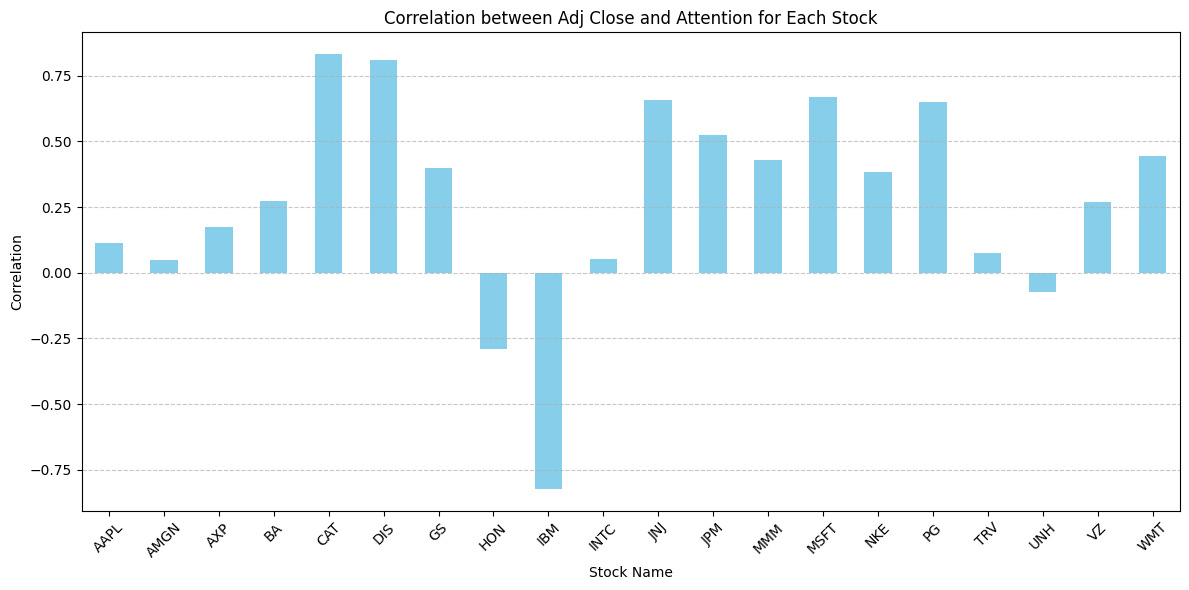

In [48]:
correlations = correlations.dropna()

# Plotting
plt.figure(figsize=(12, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Correlation between Adj Close and Attention for Each Stock')
plt.xlabel('Stock Name')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [56]:
# List of keywords will be here - can create a loop for this as well
#SOURCE: https://stockanalysis.com/list/dow-jones-stocks/
djia_tickers = [
 'MSFT',
 'AAPL', #2023-12 
 'Visa', #Visa ticker is just V - google trends might not reflect that correctly so using Visa instead; need to redo - 100 comes before 2013
 'JPM',
 'UNH', #need to redo - 100 comes before 2013
 'WMT',
 'JNJ',
 'PG', #2023-12 
 'HD', #redo
 'MRK',#redo
 'CVX',#redo
 'CRM',#redo
 'KO',#redo
 'MCD', #redo
 'CSCO', #redo
 'INTC',#redo
 'DIS',#redo
 'VZ',#redo
 'AMGN', #redo 
 'IBM',#redo
 'CAT',#redo
 'NKE',#redo
 'AXP', #redo
 'HON',#redo
 'BA',#redo
 'GS',#redo
 'MMM', #redo
 'TRV',#redo
 'TSLA',#redo
 'WBA'] #redo


In [58]:
import os

def rename_files(input_list):
    for string in input_list:
        updated_file_path = f"{string}.csv"
        
        # Check if the file exists
        if not os.path.exists(updated_file_path):
            print(f"File {updated_file_path} does not exist. Skipping to next item.")
            continue
        
        # Construct new file path
        new_file_path = f"{string}_trends.csv"
        
        # Rename the file
        os.rename(updated_file_path, new_file_path)
        print(f"Renamed {updated_file_path} to {new_file_path}")




In [59]:
# Example usage
input_list = djia_tickers
rename_files(input_list)

Renamed MSFT.csv to MSFT_trends.csv
Renamed AAPL.csv to AAPL_trends.csv
Renamed Visa.csv to Visa_trends.csv
Renamed JPM.csv to JPM_trends.csv
Renamed UNH.csv to UNH_trends.csv
Renamed WMT.csv to WMT_trends.csv
Renamed JNJ.csv to JNJ_trends.csv
Renamed PG.csv to PG_trends.csv
Renamed HD.csv to HD_trends.csv
Renamed MRK.csv to MRK_trends.csv
Renamed CVX.csv to CVX_trends.csv
Renamed CRM.csv to CRM_trends.csv
Renamed KO.csv to KO_trends.csv
Renamed MCD.csv to MCD_trends.csv
Renamed CSCO.csv to CSCO_trends.csv
Renamed INTC.csv to INTC_trends.csv
Renamed DIS.csv to DIS_trends.csv
Renamed VZ.csv to VZ_trends.csv
Renamed AMGN.csv to AMGN_trends.csv
Renamed IBM.csv to IBM_trends.csv
Renamed CAT.csv to CAT_trends.csv
Renamed NKE.csv to NKE_trends.csv
Renamed AXP.csv to AXP_trends.csv
Renamed HON.csv to HON_trends.csv
Renamed BA.csv to BA_trends.csv
Renamed GS.csv to GS_trends.csv
Renamed MMM.csv to MMM_trends.csv
Renamed TRV.csv to TRV_trends.csv
Renamed TSLA.csv to TSLA_trends.csv
Renamed WBA.

In [ ]:
def xlsx_to_csv(input_list):
    for stock in input_list:
        # Construct input and output file paths
        input_file = f"{stock}.xlsx"
        output_file = f"{stock}_financials.csv"
        #output_file = os.path.join(output_folder, f"{stock}_financials.csv")

        # Read the Excel file into a pandas DataFrame
        df = pd.read_excel(input_file)
    
        # Write the DataFrame to a CSV file
        df.to_csv(output_file, index=False)

